# Odemis to Hyperspy

Thus notebook demonstrates how to import a cathodoluminescence (CL) file from the Odemis hdf5 format to the Hyperspy package. Navigation cursors are created to a) access spectra at different positions and b) create images filtered for a specific CL wavelength.
This notebook requires the odemishspy.py script to be in the same folder

The SEM image also contained in the Odemis h5 file is not imported!


http://hyperspy.org/

http://www.delmic.com/odemis


# init cell (run first)

In [1]:
%matplotlib nbagg
import h5py as h5
import hyperspy.api as hs
import numpy as np

# odemis h5 to hspy function:
from odemishspy import odemis_to_hyperspy, odemisSEM_to_hyperspy

# switch off the too many warnings...
import warnings
warnings.filterwarnings('ignore')



/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
The Bruker composite file reader can not be loaded because the lxml library is not installed. To enable it install the Python lxml package.


# The basic stuff
A hyperspectral map from Odemis is imported as a Signal1D object in Hyperspy. The hyperspy.api.plot() command automatically creates navigation cursors in the image which you can use to view the CL spectra at each coordinate. By transposing the object a Signal2D object is created where the navigator is attached to a spectrum. By selecting the wavelength the CL image is filtered to signals at this wavelength

The cursors can be moved by draging with the mouse or by first clicking into the plot and the using the cursor keys on the keyboard!


<sampledata/cltest.h5> original shape : (2560, 1, 1, 102, 23)
hyperspy shape : (23, 102, 2560)


<IPython.core.display.Javascript object>


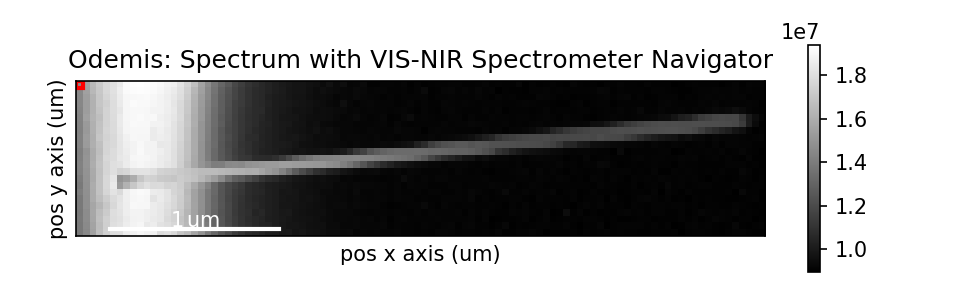

<IPython.core.display.Javascript object>


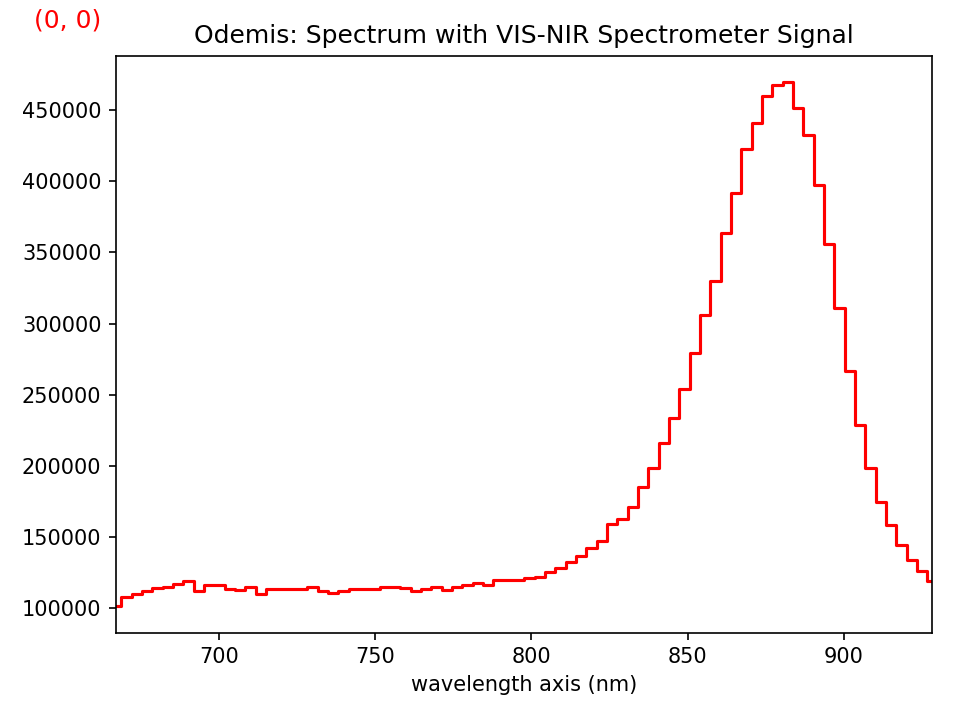

VBox(children=(HBox(children=(Label(value='pos x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=101), BoundedFloatText(value=0.14638844301765677, continuous_update=True, description='value', max=4.186388443017659, min=0.14638844301765677, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), HBox(children=(Label(value='pos y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=22), BoundedFloatText(value=0.32022471910112293, continuous_update=True, description='value', max=1.2002247191011235, min=0.32022471910112293, step=0.04000000000000002), Label(value='um', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


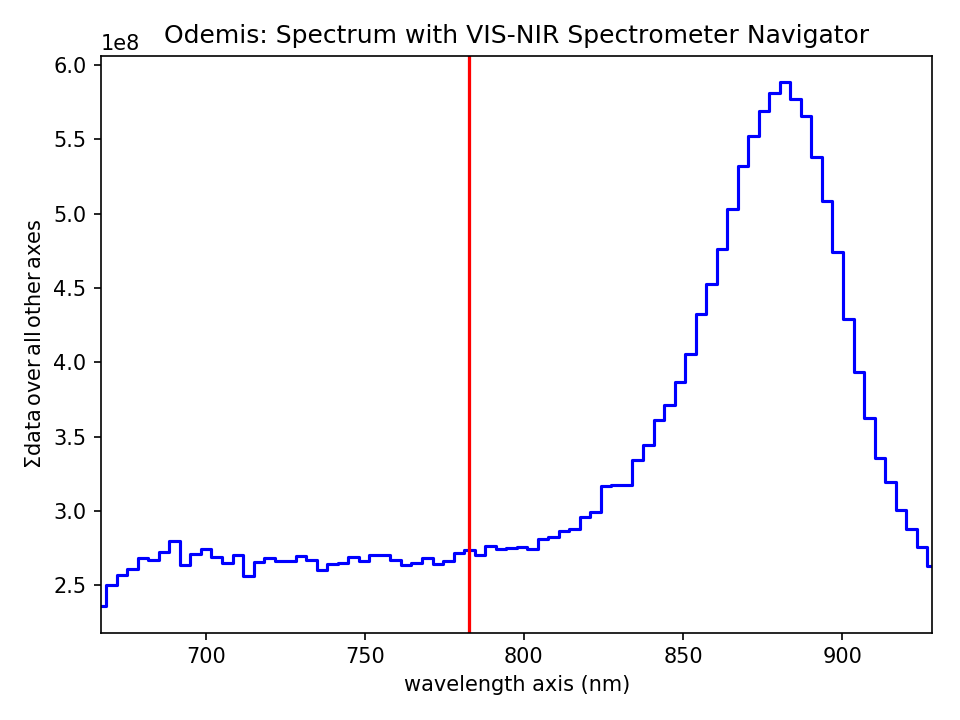

<IPython.core.display.Javascript object>


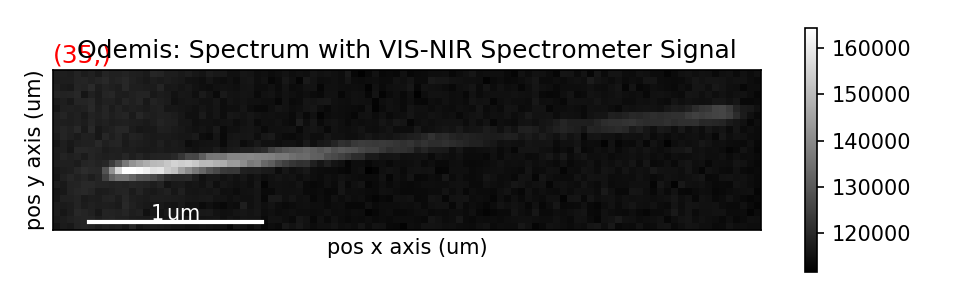

In [7]:

s = odemis_to_hyperspy('sampledata/cltest.h5',specbin=32)   


# the standard data mapper gives us an CL (integrated) image to navigate
# a spectrum is shown for each pixel

# bin the data if needed, here spectral data is binned (3rd element in list)
#s = s.rebin(scalem=[1,1,32])
#print('hyperspy rebin shape :' ,s.data.shape)

s.plot()
s.axes_manager.gui_navigation_sliders()


# the transposed mapping uses the spectral postion as a navigator and
# shows an image representting the counts at that wavelength
s2 = s.transpose()
s2.plot()

# How to access the data selected with the navigation cursors?

<IPython.core.display.Javascript object>


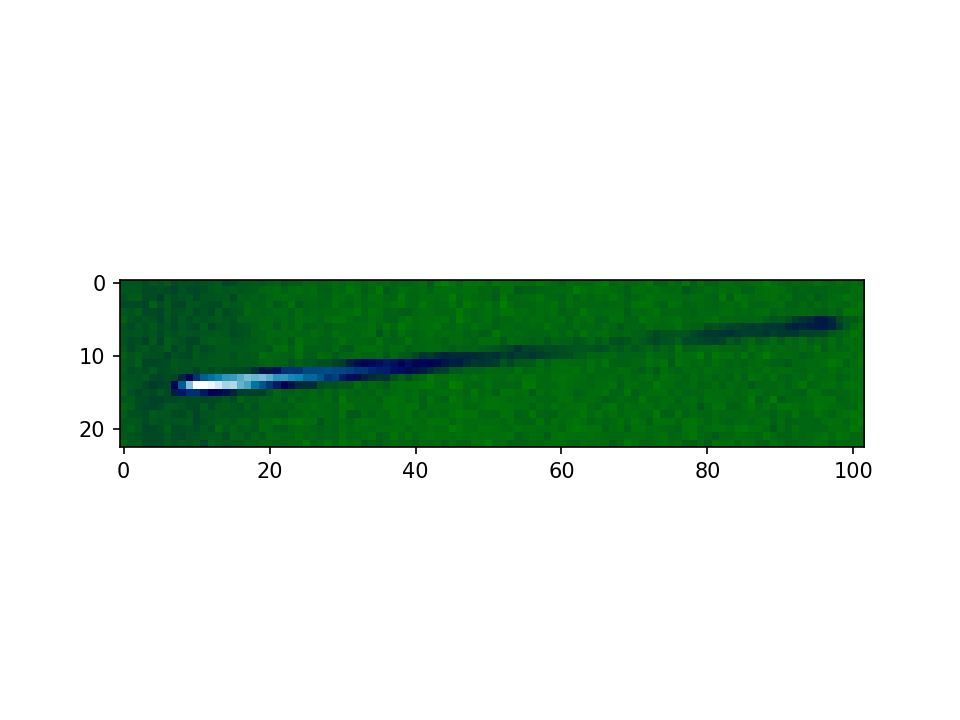

coordinates:  (782.852071078658,)


<IPython.core.display.Javascript object>


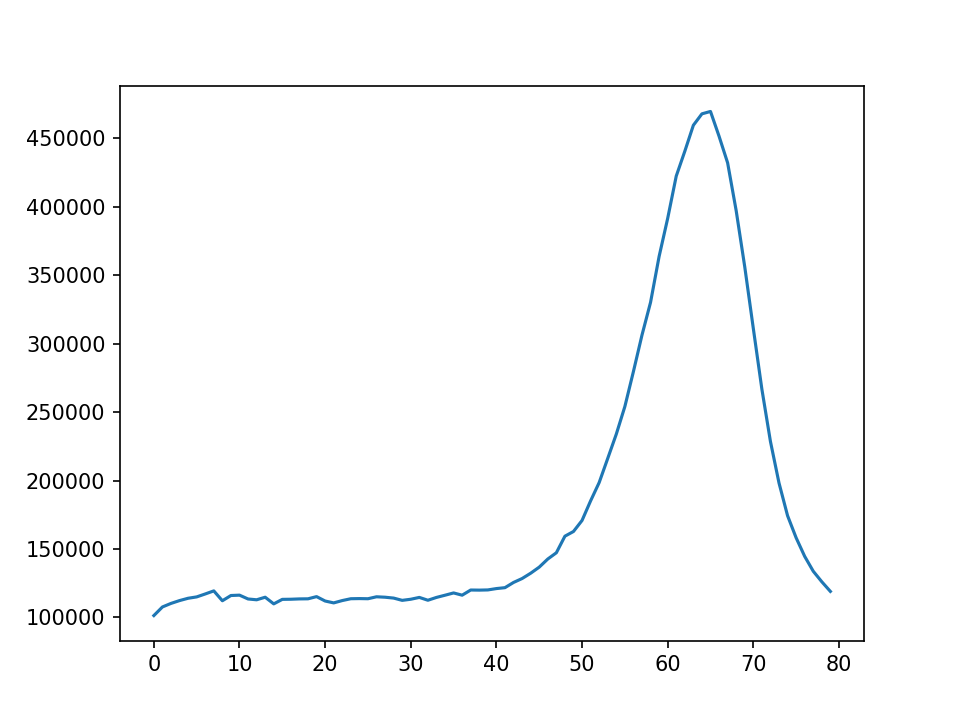

coordinates:  (0.14638844301765677, 0.32022471910112293)


In [9]:
import matplotlib.pyplot as plt

#access the data selected with the cursors in the previous cell:

k = s2.axes_manager.indices[0]
y = s2.data[k,:,:]
plt.figure()
plt.imshow(y, interpolation='nearest', cmap=plt.cm.ocean)
plt.show()
wk = s2.axes_manager.coordinates
print('coordinates: ', wk)

k,l = s.axes_manager.indices
y = s.data[k,l,:]
plt.figure()
plt.plot(y)
plt.show()
wk = s.axes_manager.coordinates
print('coordinates: ', wk)


# load panchromatic CL images and SEM images

<sampledata/cltestpm.h5> original shape : (1, 1, 1, 728, 512)
hyperspy shape : (512, 728)
<sampledata/cltestpm.h5> original shape : (1, 1, 1, 728, 512) panchrom
hyperspy shape : (512, 728)


<IPython.core.display.Javascript object>


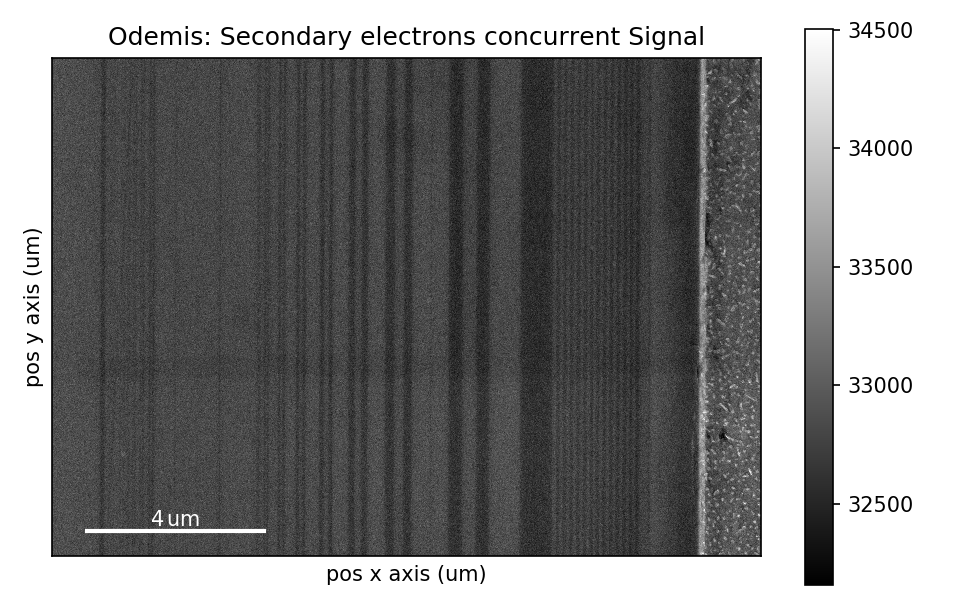

<IPython.core.display.Javascript object>


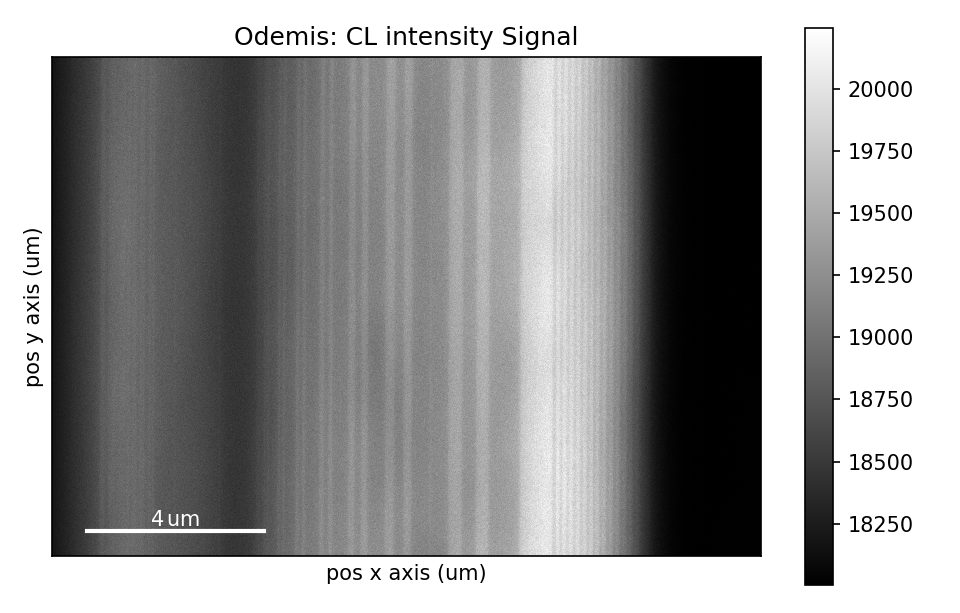

In [2]:
sem=odemisSEM_to_hyperspy('sampledata/cltestpm.h5')
cl=odemis_to_hyperspy('sampledata/cltestpm.h5')
sem.plot()
cl.plot()